In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv as mat_inv
from dataset import SpectralDataset

In [9]:
class RXRunner:
    def __init__(self, data, verbose=True):
        si = data.image      # Spectral image
        self.img_shape = si.shape[:-1]
        self.objects = data.objects.reshape(-1)
        self.si = si.reshape(-1, si.shape[2])
        self.m = self.si.shape[0]
        self.p = self.si.shape[1]
        if verbose: 
            print(f'Shape of spectral: {self.si.shape}')
        mu_b = self.background_mean
        total_covar = np.zeros((self.p, self.p))
        for x in self.si:
            residual = x - mu_b
            covar = residual * residual.reshape(-1, 1)
            total_covar += covar
        c_b = total_covar / self.m
        delta = np.zeros(self.m)
        
        # Calc \delta _RX
        for i, r in enumerate(self.si):
            residual = r - mu_b
            delta[i] = np.dot(np.dot(residual, mat_inv(c_b)), residual)
            if verbose and (i+1) % 100 == 0:
                print(f'\r{(i+1)/self.m*100:.2f}%', end='')
        self.delta = delta
        
    @property
    def background_mean(self):
        return np.sum(self.si, axis=0) / self.m
    
    def show(self):
        plt.imshow(self.delta.reshape(self.img_shape))
        plt.show()
    

rx = RXRunner(SpectralDataset('airport1'))

Shape of spectral: (10000, 205)
100.00%

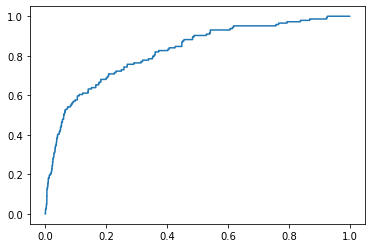

In [11]:
from roc import roc_curve

detected_delta = rx.delta.reshape(-1)
xs, ys = roc_curve(detected_delta, rx.objects)
plt.plot(xs, ys)